In [1]:
# 데이터 분석
import numpy as np
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋
from sklearn import datasets

# PCA
from sklearn.decomposition import PCA

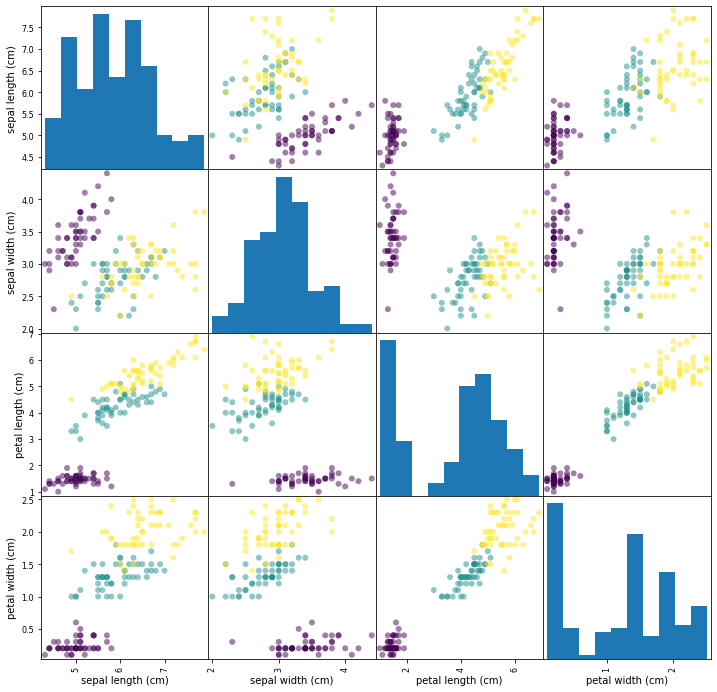

In [2]:
from pandas.plotting import scatter_matrix

iris = datasets.load_iris()
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# 각각의 성분에 대한 분포를 확인 할 수 있다.
scatter_matrix(df_iris, c=iris['target'], marker='o', figsize=(12,12))
plt.show()

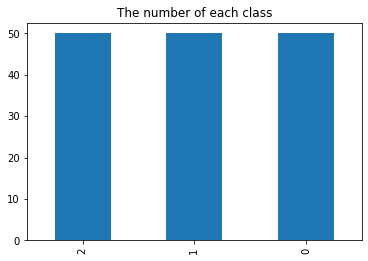

In [3]:
# 독립변수와 종속변수 확인
x = iris.data
y = iris.target
feature_names = iris.feature_names

df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)


df_y[0].value_counts().plot(kind='bar') # 각 class의 개수 
plt.title('The number of each class')
plt.show()


C:\Users\Kwon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kwon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kwon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

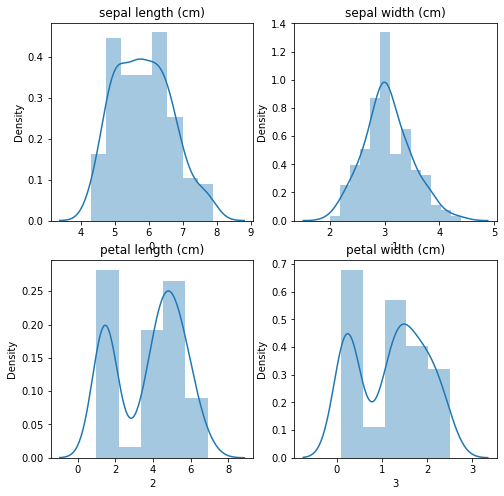

In [4]:
# 각각의 독립변수가 정규분포에 가깝게 잘 분포하고 있는 것을 볼 수 있음
plt.figure(figsize=(8,8))
for i in range(df_x.shape[1]):
    plt.subplot(int('22'+str(i+1)))
    sns.distplot(df_x[i])
    plt.title(feature_names[i])
plt.show()

In [5]:
pca = PCA()
pca.fit(x)
pca_score = pca.transform(x) # pca에 의해 변환된 축
print(pca_score[:3])

print('eigen vector of pca: \n', pca.components_)

print('\nvariance의 크기: ', pca.explained_variance_)
# 첫번재 성분의 분산이 가장 큰 것을 알 수 있음

ratio = pca.explained_variance_ratio_
print('\nvariance의 비율: ', ratio)

[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]]
eigen vector of pca: 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]

variance의 크기:  [4.22824171 0.24267075 0.0782095  0.02383509]

variance의 비율:  [0.92461872 0.05306648 0.01710261 0.00521218]


,variance_ratio
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


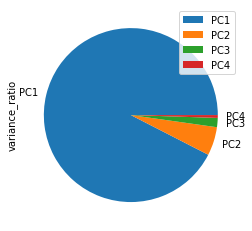

In [6]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['variance_ratio'])
df_v.plot.pie(y='variance_ratio')
df_v

Text(0.5, 1.0, 'PCA of IRIS dataset')

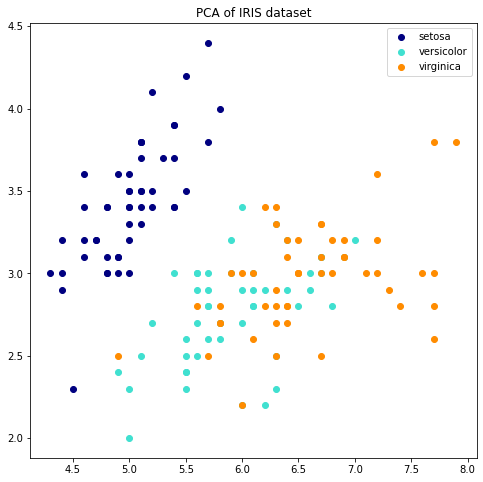

In [7]:
# x[0], x[1] 축을 통해 알아본 iris data의 분포, 점들이 섞여있어 이를 분리하기 힘들다.
plt.figure(figsize=(8,8))
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Text(0.5, 1.0, 'PCA of IRIS dataset')

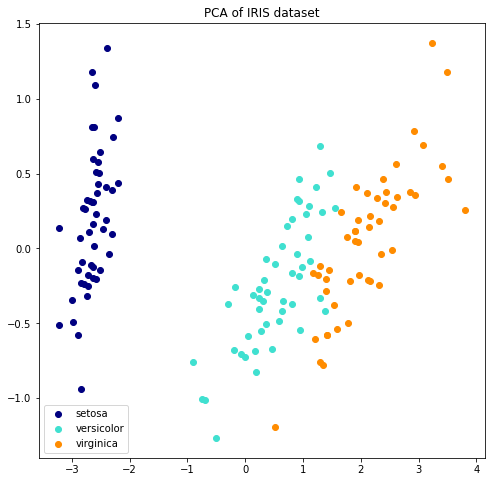

In [8]:
# PC1, PC2 축에 의한 분포, 각 데이터가 잘 나뉘어져 있어보인다.
plt.figure(figsize=(8,8))
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(pca_score[y == i, 0], pca_score[y == i, 1], color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [9]:
# 성능비교 2가지 특성을 가지고 비교했을 때
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix # 각 데이터가 어떤 클래스로 예측했는지 쉽게 볼 수 있음

[[50  0  0]
 [ 0 37 13]
 [ 0 14 36]]


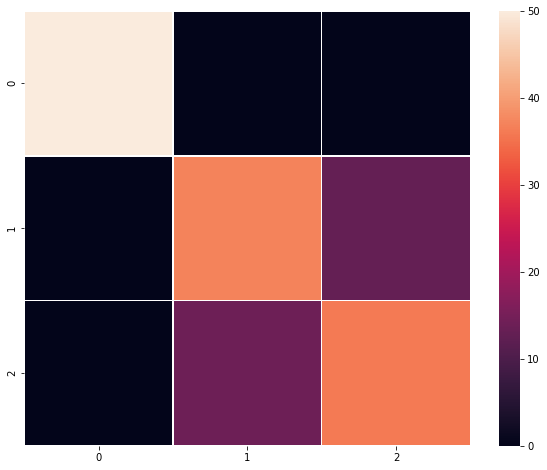

In [10]:
# 원래의 축 사용
clf = LogisticRegression()
clf.fit(x[:,:2], y)
pred = clf.predict(x[:,:2]) # 2번 특성까지만 사용
out = confusion_matrix(y, pred)
print(out)
plt.figure(figsize=(10,8))
sns.heatmap(out, linewidth=0.3)
plt.show()

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


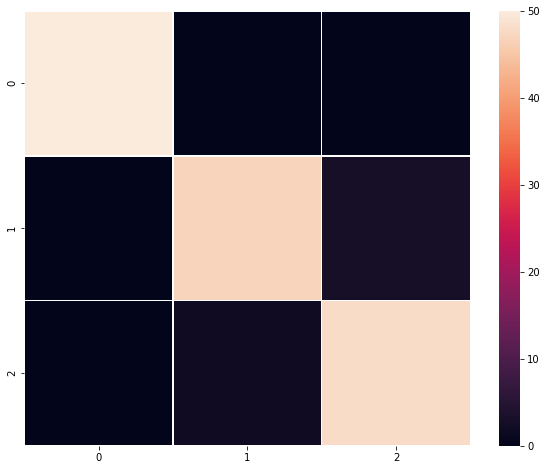

In [11]:
# PC 축 사용
clf = LogisticRegression()
clf.fit(pca_score[:,:2], y)
pred = clf.predict(pca_score[:,:2]) # 2번 특성까지만 사용
out = confusion_matrix(y, pred)
print(out)
plt.figure(figsize=(10,8))
sns.heatmap(out, linewidth=0.3)
plt.show()